Dăscălescu Dana            
Stern Cristian David <br>
Grupa: 231

#### Pentru aceasta analiză vom folosi setul de date 'rock' (conține măsurători pentru 48 de probe de rocă dintr-un rezervor de petrol) care vine în mod implicit cu R.
Datele stabilite pentru acest studiu de caz au fost destinate să răspundă cel puțin la următoarele întrebări:
1. Ce valori trebuie luate în considerare pentru a determina care roci vor face un bun rezervor?  O rocă care este atât poroasă cât și permeabilă ar face o rocă de acumulare bună, deoarece permite petrolului și gazului să se deplaseze în sus prin porii din rocă, mai aproape de suprafața de unde poate fi extrasă.
2. Care este inter-relația(corelația) dintre forma spațiului porilor și permeabilitatea unei roci? Dar cea dintre aria porilor, forma acestora și permeabilitatea unei roci?


# 1. Operații de statistică descriptivă. 

In [75]:
head(rock)  # display the first 6 observations
attach(rock)

area,peri,shape,perm
4990,2791.90,0.0903296,6.3
7002,3892.60,0.1486220,6.3
7558,3930.66,0.1833120,6.3
7352,3869.32,0.1170630,6.3
7943,3948.54,0.1224170,17.1
7979,4010.15,0.1670450,17.1


###### Considerăm fiecare variabilă a setului de date separat.

> Area:

In [76]:
summary(area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1016    5305    7487    7188    8870   12212 

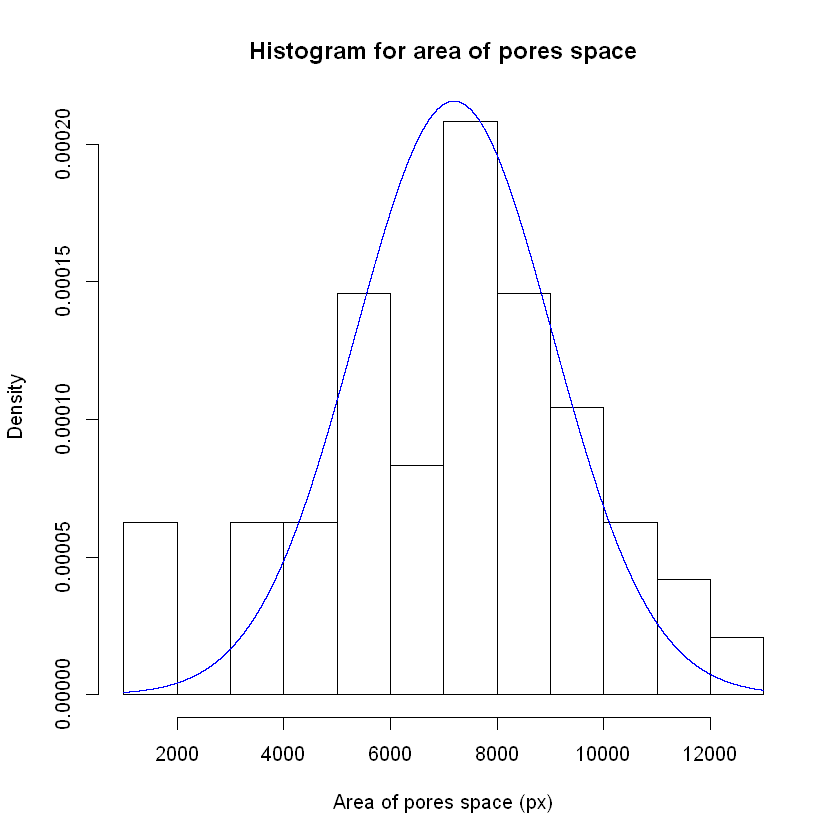

In [77]:
h1 <- hist(area,
     main="Histogram for area of pores space",
     xlab="Area of pores space (px)",
     freq = F,
     breaks=13)
t <- seq(1000, 13000, 0.1)
lines(t, dnorm(t, mean(area), 1850), col="blue")

&emsp; O _diagramă de frecvență_ dă o impresia imediată asupra valorilor, frecvenței relative și împrăștierii asociate datelor. 
Ea este obținută dacă ordonata histogramei este împărțită la numărul total de observații, 48 în acest caz, 
și la lățimea intervalului $ \Delta $. Este important să fie ales un număr de intervale în concordanță cu informația care
vrea să fie extrasă  din modelul matematic.
Numărul de intervale ales $ \Delta $ este dat de formula $ 1 + 3,3*\ln n  $ ( Sturges, în 1926, a sugerat, ca un model practic, 
ca numărul de intervale alese k să fie <br> <center> $ k = 1 + 3,3 * \ln n $ </center> <br> unde _n_ este numărul de date).

&emsp; Distribuția este aproximativ în formă de clopot, care este forma distribuției normale(Gaussiană). Spre deosebire de o adevărată distribuție normală, această distribuție este asimetrică; are o coadă care se întinde mai mult spre stânga decât spre dreapta, dar diferențele nu sunt mari.

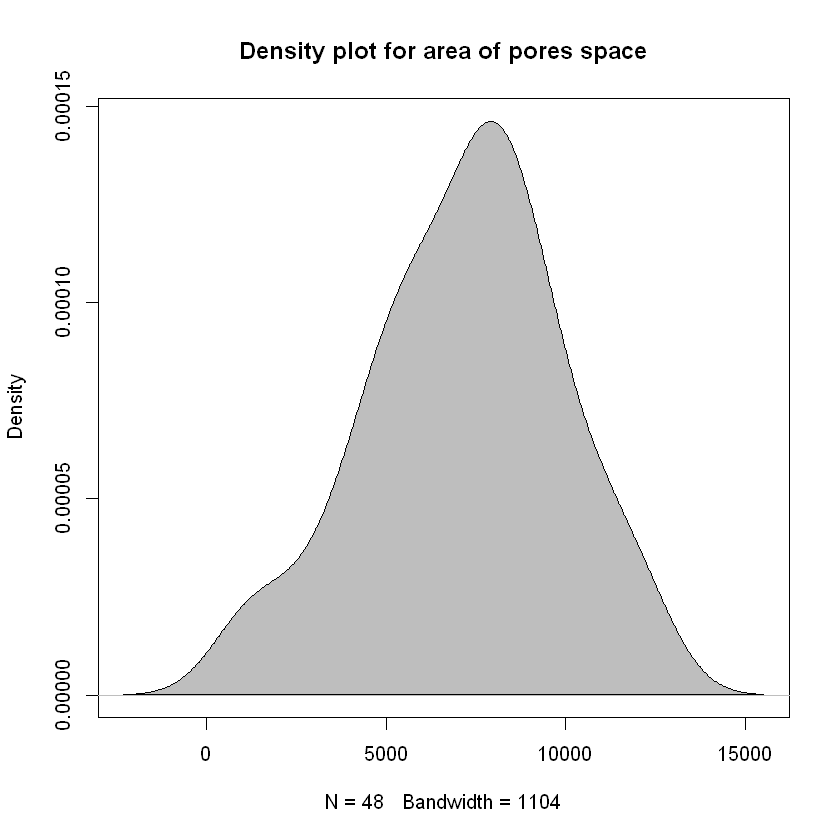

In [78]:
plot(density(area), main = "Density plot for area of pores space")
polygon(density(area), col="gray")

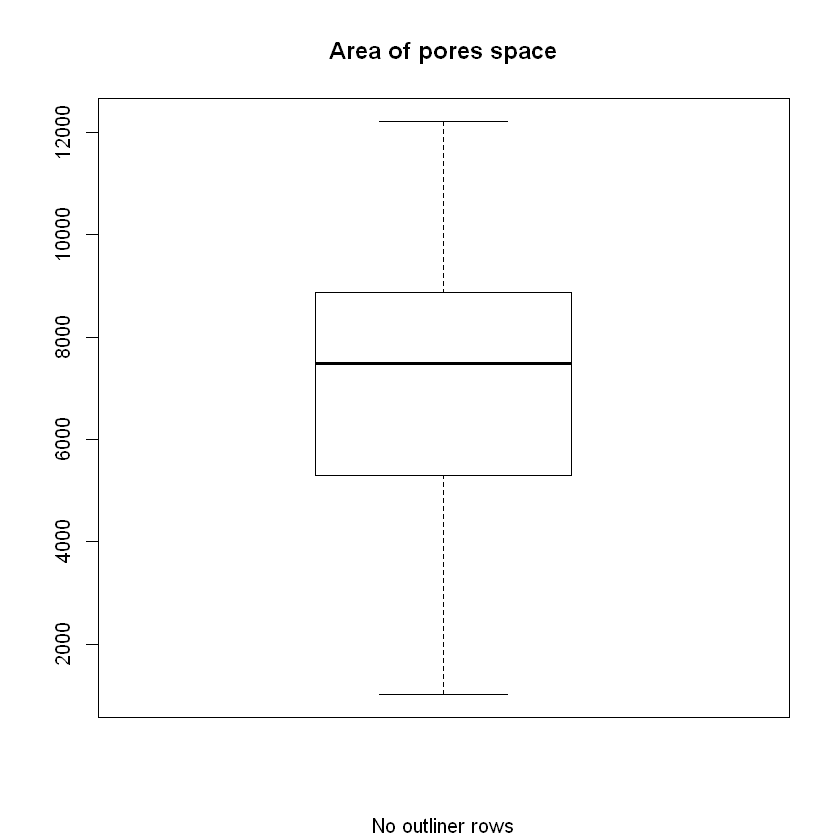

In [79]:
boxplot(area, main="Area of pores space", sub = paste("No outliner rows"));

> Peri

In [80]:
summary(peri)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  308.6  1414.9  2536.2  2682.2  3989.5  4864.2 

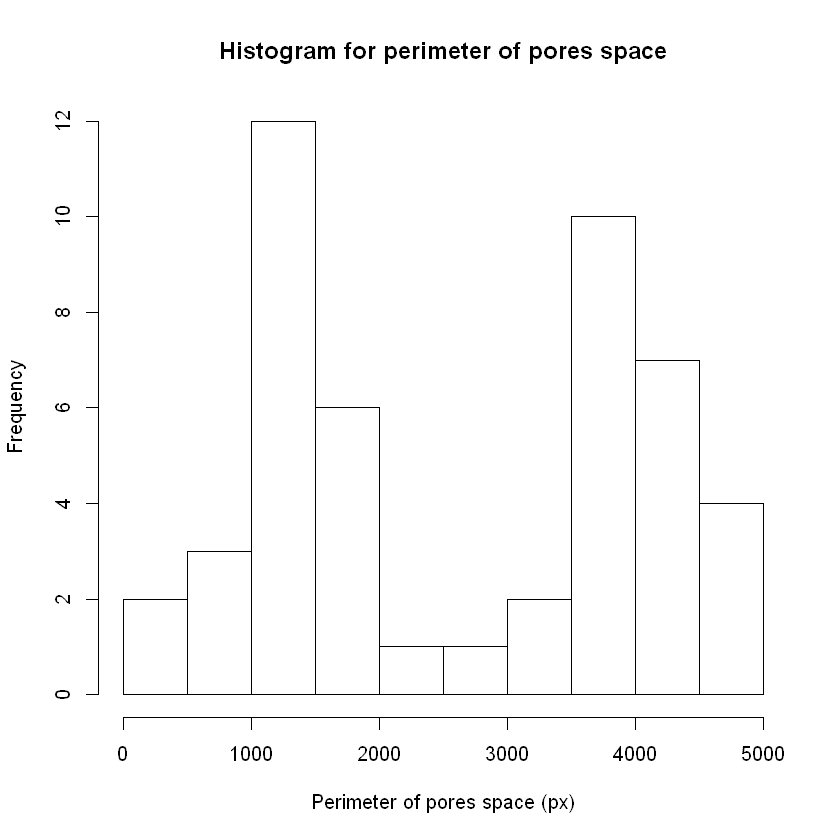

In [81]:
h2 <- hist(peri,
     main="Histogram for perimeter of pores space",
     xlab="Perimeter of pores space (px)",
     breaks=13)

Distributia perimetrului porilor este bimodală.

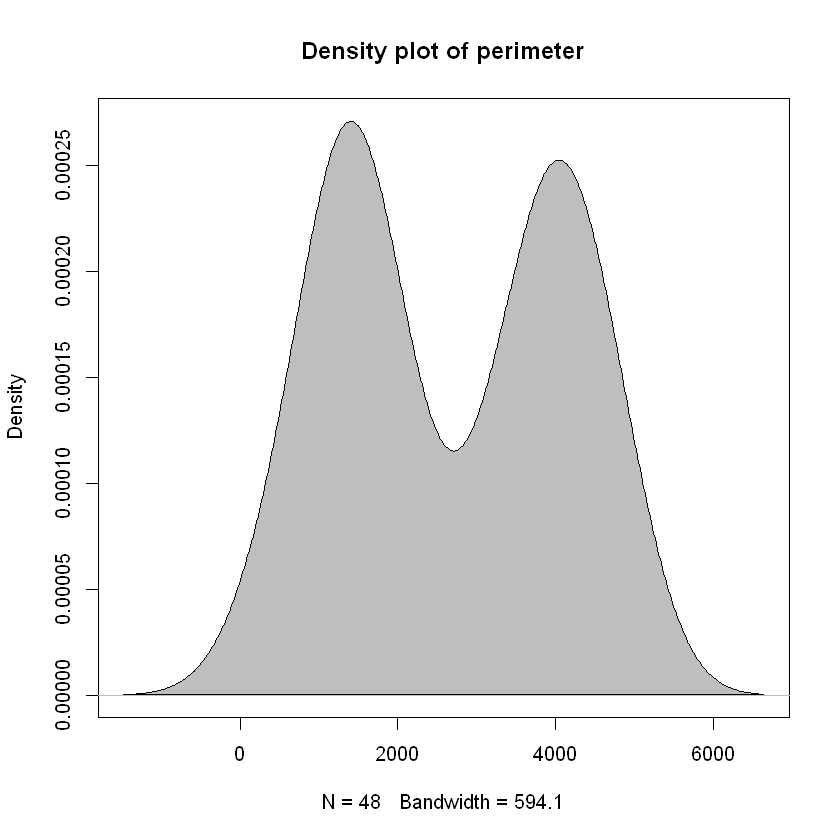

In [83]:
plot(density(peri), main="Density plot of perimeter")
polygon(density(peri), col="gray")

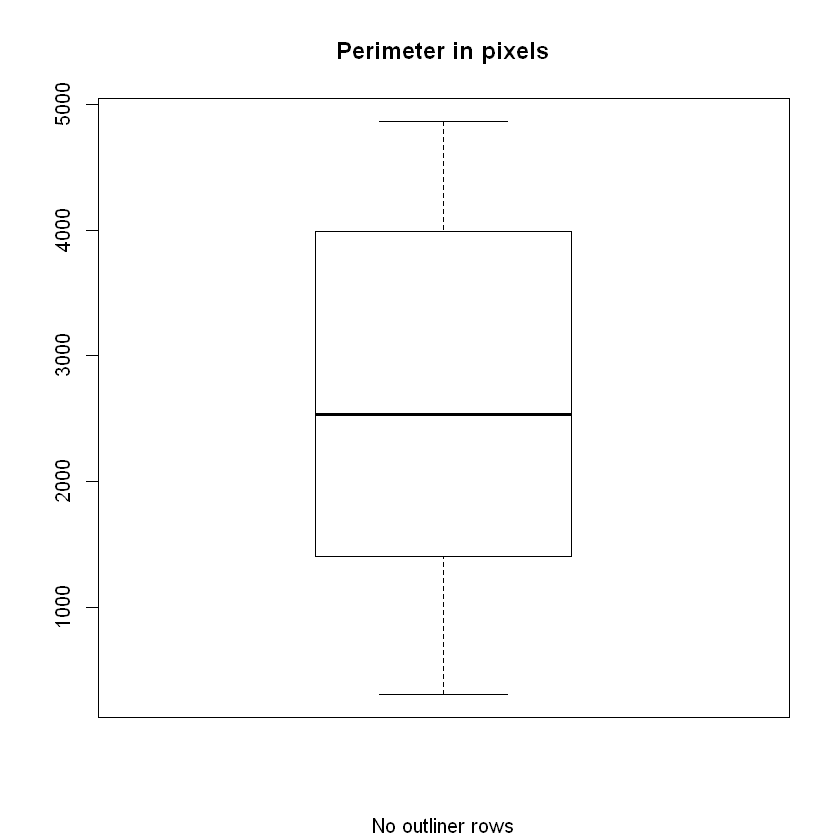

In [84]:
boxplot(peri, main="Perimeter in pixels", sub = paste("No outliner rows"));

> Shape

In [85]:
summary(shape)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09033 0.16226 0.19886 0.21811 0.26267 0.46413 

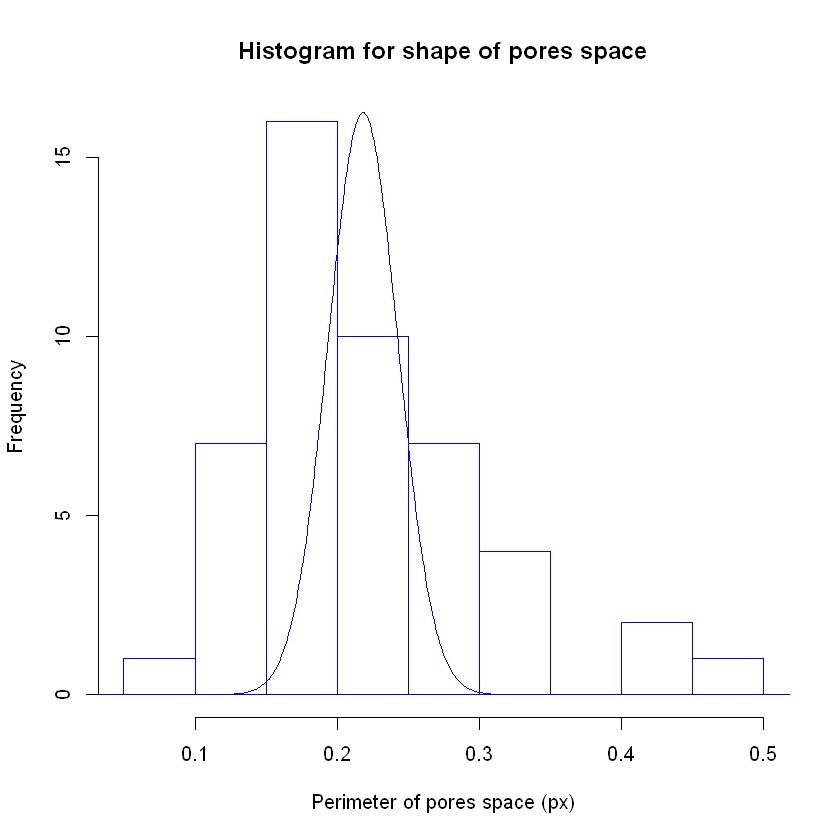

In [86]:
h3 <- hist(shape,
     main="Histogram for shape of pores space",
     xlab="Perimeter of pores space (px)",
     ylab="Frequency", 
     border="blue",
     breaks=13)
lines(seq(0, 1, by=0.001), dnorm(seq(0, 1, by=0.001), mean(shape), sd(shape)/3.4), col="blue")

O histograma inclinata in stanga sugereaza ca media perimetrelor porilor in pixeli este mai mare decat mediana acestora.

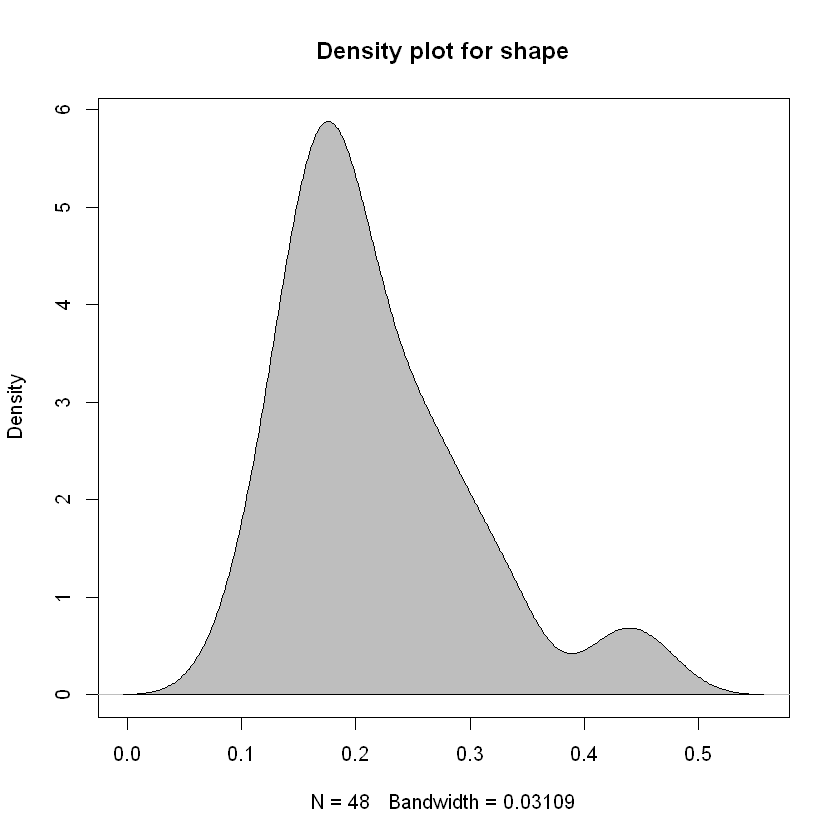

In [88]:
plot(density(shape), main="Density plot for shape")
polygon(density(shape), col="gray")

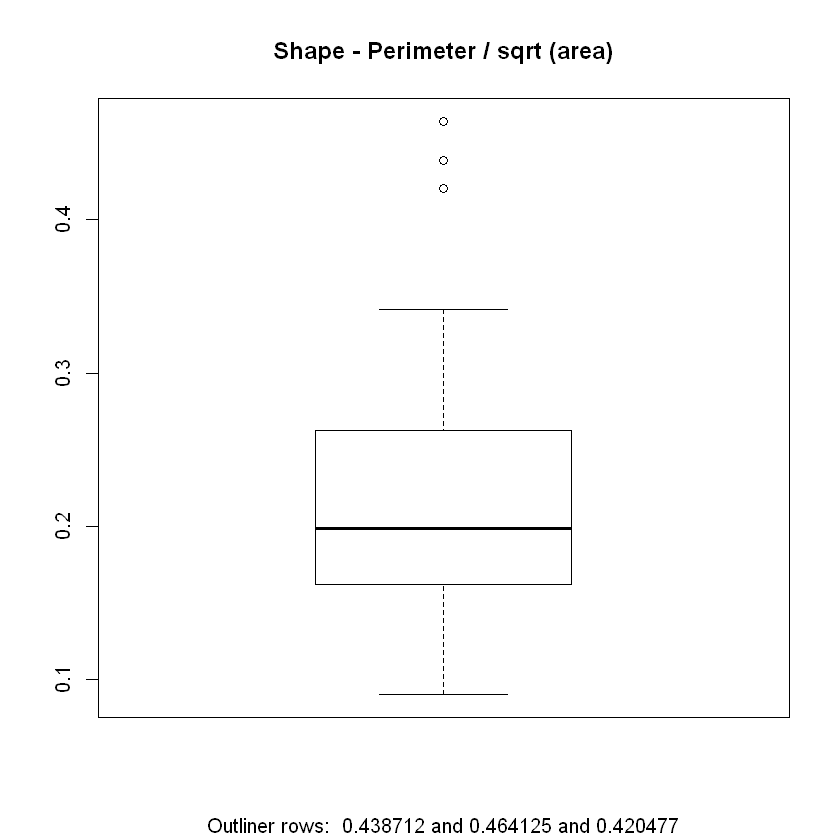

In [89]:
outliers <- boxplot(shape,
                    main="Shape - Perimeter / sqrt (area)", 
                    sub = paste("Outliner rows: ", paste(boxplot.stats(shape)$out, collapse=' and ')
                    ));
# We will check if the ouliers should be taken into consideration. The variables with a large shape of pores, but with a lower 
# permeability will be extracted from the data. Further investigations must be conducted on this variables(for this it must be 
# taken into consideration others parameters, like the nature of the rock and how the pores are arranged and if they are
# connected) and then decided how they influence the fenomen of permeability.


In [90]:
outliers

0.0903296
0.1621295
0.1988620
0.2626890
0.3412730
0.1759291
0.2217949


In [91]:
#Checking the three outlier's permeability values, we observed that two of them have the permeability 1300, while the other one
#coresponds with a permeability of 100. So we decided to get rid of it because we consider it will badly affect our model.
rock_initial <- rock
rock <- rock[-c(38),]

In [92]:
rock

,area,peri,shape,perm
1,4990,2791.900,0.0903296,6.3
2,7002,3892.600,0.1486220,6.3
3,7558,3930.660,0.1833120,6.3
4,7352,3869.320,0.1170630,6.3
5,7943,3948.540,0.1224170,17.1
6,7979,4010.150,0.1670450,17.1
7,9333,4345.750,0.1896510,17.1
8,8209,4344.750,0.1641270,17.1
9,8393,3682.040,0.2036540,119.0
10,6425,3098.650,0.1623940,119.0


> Perm

In [93]:
summary(perm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.30   76.45  130.50  415.45  777.50 1300.00 

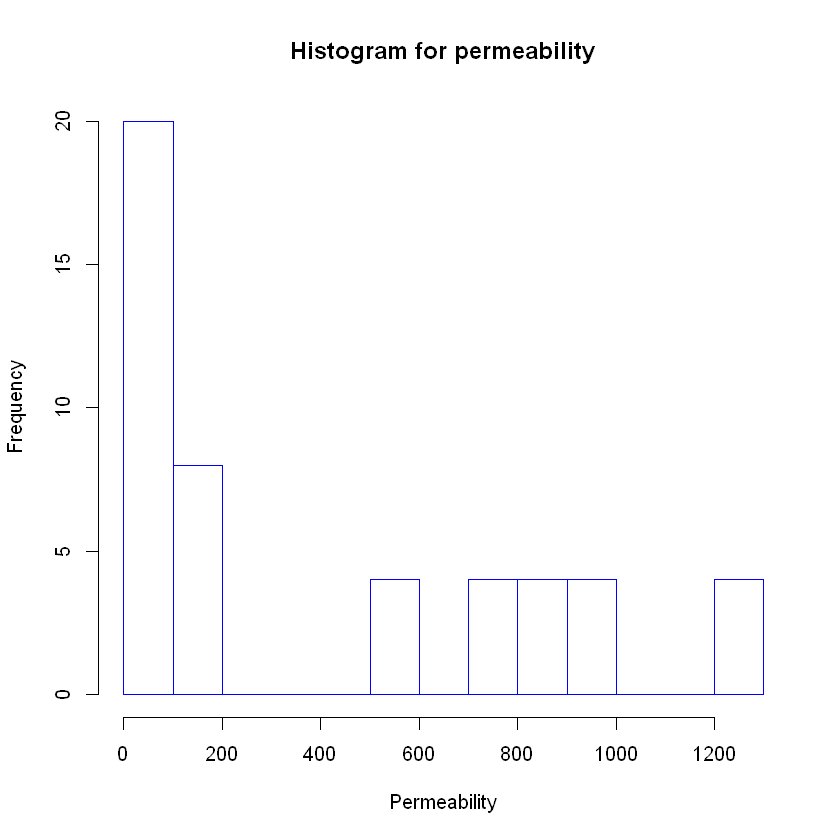

In [94]:
h4 <- hist(perm,
     main="Histogram for permeability",
     xlab="Permeability",
     ylab="Frequency", 
     border="blue",
     breaks=13)

&emsp; Avem o histogramă înclinată pozitiv, fapt datorat și de numărul mic de date pe care îl analizăm.
Din cele 47 de roci luate în considerare $ 43\% $ din roci au permeabilitatea între 0 și 200.

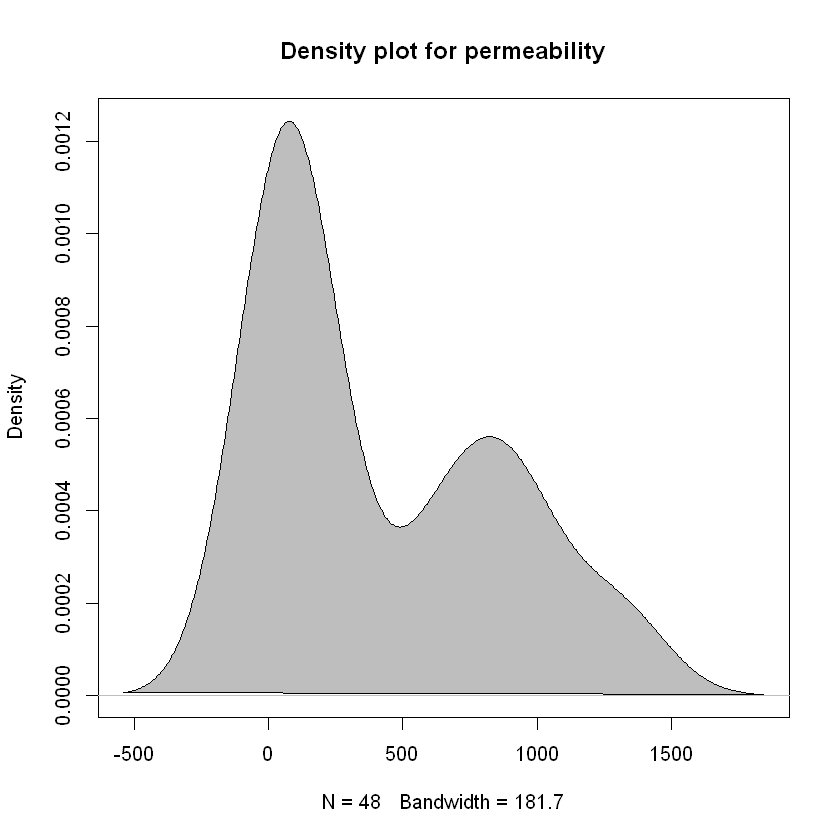

In [96]:
plot(density(perm), main="Density plot for permeability")
polygon(density(perm), col="gray")

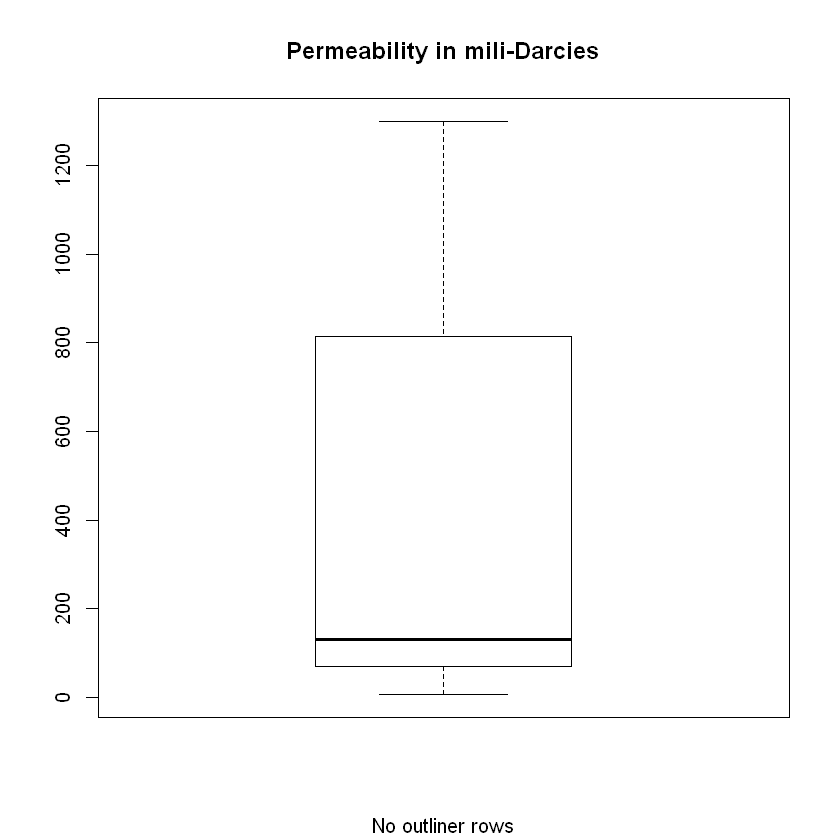

In [97]:
boxplot(rock_initial$perm, main="Permeability in mili-Darcies", sub = paste("No outliner rows"));

# 2. Modele de regresie

## 2.1 Regresie simplă
###### Scop: De a construi un model de regresie simplă pe care îl putem folosi pentru a prezice permeabilitatea prin stabilirea unei relații liniare semnificative statistice cu forma suprafeței porilor

### I. Analiza grafică

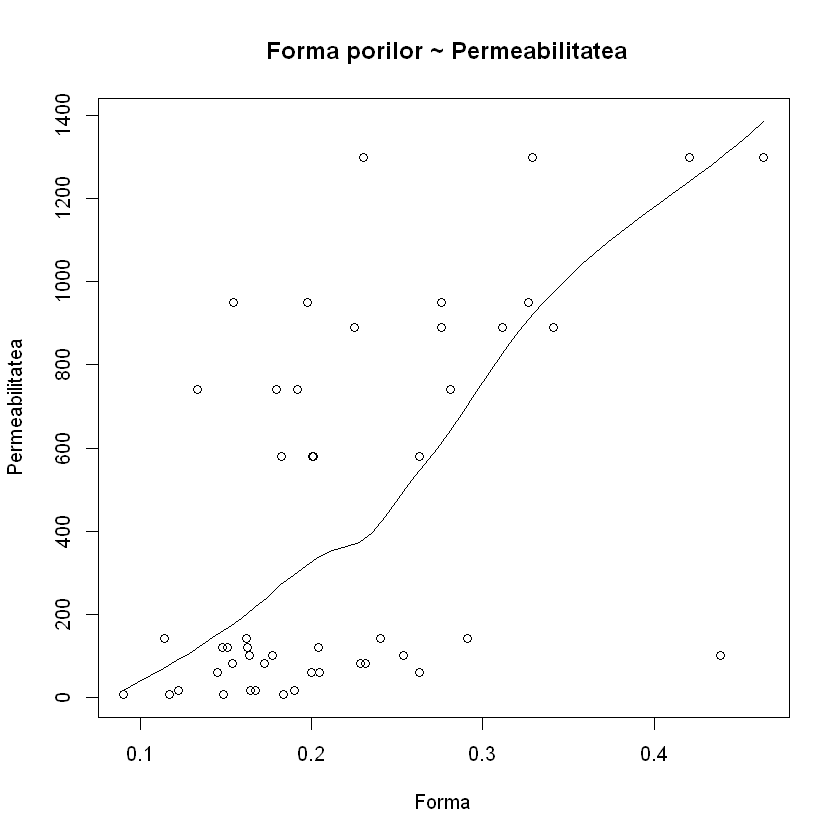

In [98]:
scatter.smooth(x=shape, y = perm, xlab = "Forma", ylab = "Permeabilitatea" , main = " Forma porilor ~ Permeabilitatea");

Diagrama de împrăștiere sugerează o relație de creștere liniară dintre 'shape' și 'perm'. Ceea ce îndeplinește cerința ca într-o regresie liniară relația dintre variabila răspuns și variabila predictor să fie liniară și aditivă.

### Verifică existența valorilor aberante

Valorile extreme(aberante) pot denatura predicțiile și pot afecta precizia. Din acest motiv este important să le identificăm și să le tratăm corespunzător.

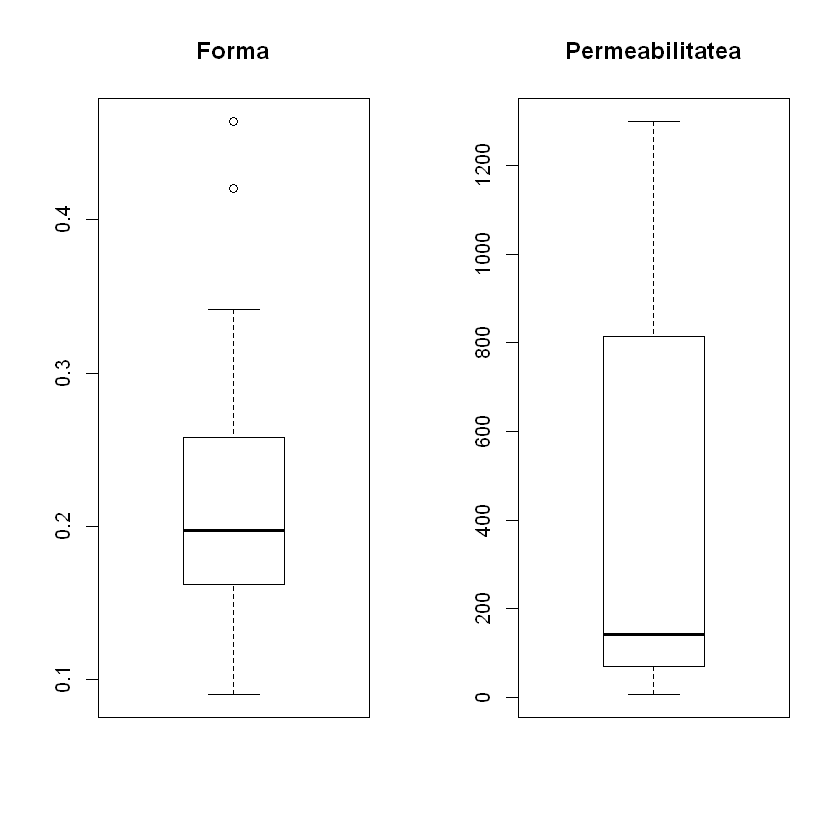

In [99]:
par(mfrow=c(1, 2))
boxplot(rock$shape, main="Forma", outline = TRUE)
boxplot(rock$perm, main="Permeabilitatea", outline = TRUE)

&emsp; Variabila cu o formă mare a porilor, dar cu o valoare mai mică a permeabilității a fost extrasă anterior din setul de date. Anumite investigații trebuie efectuate pe această variabilă (pentru aceasta trebuie să fie luate în considerare alți parametri, cum ar fi natura rocii și modul în care sunt aranjați porii și dacă sunt conectați) ulterior să decidem dacă variabila ar influența proprietatea de permeabilitate și cărui fapt i se datorează această anomalie.

### Densitatea 

Warning message:
"package 'e1071' was built under R version 3.6.2"

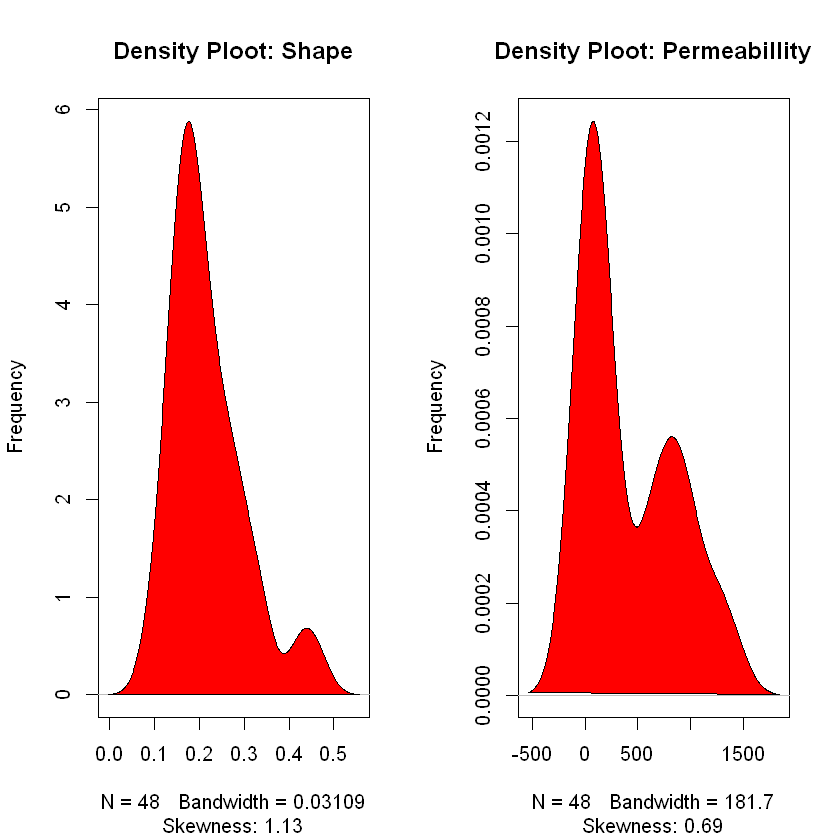

In [100]:
library(e1071)
par(mfrow=c(1, 2))
plot(density(shape), main="Density Ploot: Shape", ylab="Frequency"
    , sub= paste("Skewness:", round(e1071::skewness(shape), 2)))
polygon(density(shape), col="red")
plot(density(perm), main="Density Ploot: Permeabillity", ylab="Frequency"
    , sub= paste("Skewness:", round(e1071::skewness(perm), 2)))
polygon(density(perm), col="red")

### Corelația

&ensp; Coefiecientul de corelație măsoară interdependența liniară a variabilelor aleatoare, adică acuratețea cu care o variabilă aleatoare poate fi aproximată printr-o funcție liniară de cealaltă.

In [101]:
cor(shape, perm)

[1] 0.5567208

&ensp; Coeficientul de corelație aparține intervalului $ [0.25,0.75] $ ceea ce indică că variabilele sunt corelate. Am ales aceste variabile întricât nu sunt puternic corelate și dorim să evităm fenomenul de **'overfitting'**.

### Construim regresia liniară

In [102]:
linearMod <- lm(perm ~ shape, data=rock) #build linear regression model
print(linearMod)


Call:
lm(formula = perm ~ shape, data = rock)

Coefficients:
(Intercept)        shape  
     -366.8       3696.8  



Acum că am construit modelul liniar, am stabilit, de asemenea, relația dintre variabila predictor și variabila răspuns sub forma unei formule matematice pentru variabila răspuns(shape) și predictorul(perm). <br>
<center> $ permeability = Intercept + ( \beta * shape) \iff permeability = -221.3 + 2919.2 * shape $ </center>


In [103]:
summary(linearMod)
AIC(linearMod)


Call:
lm(formula = perm ~ shape, data = rock)

Residuals:
    Min      1Q  Median      3Q     Max 
-567.08 -228.24  -61.85  205.24  816.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -366.8      145.0  -2.530    0.015 *  
shape         3696.8      639.1   5.785 6.51e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 336.9 on 45 degrees of freedom
Multiple R-squared:  0.4265,	Adjusted R-squared:  0.4137 
F-statistic: 33.46 on 1 and 45 DF,  p-value: 6.513e-07


[1] 684.4069

&ensp; Înainte să folosim modelul trebuie să ne asigurăm că modelul de regresie construit este semnificativ din punct de vedere statistic. 

&emsp; Fie $X_{1} $,$X_{2} $,...,$X_{n} $ o seleție independentă de mărime n dintr-o populație X cu o presupusă densitate f(x;$ \Theta $) sau masă p(x;$ \Theta $), unde $ \Theta $ poate fi specificată sau nu. Notăm cu _H_ ipoteza că selecția reprezintă n valori ale unei variabile aleatoare cu densitatea f(x;$ \Theta $) sau masă p(x;$ \Theta $). Această ipoteză este numită _ipoteză simplă_ când repartiția este complet specificată când repartiția este complet specificată, adică valorile parametrului sunt specificate împreună cu forma funcțională a densității sau masei, altfel este o ipoteză compusă. Pentru a construi un criteriu pentru testarea ipotezelor este necesar să fie stabilită o ipoteză alternativă împotriva căreia ipoteza _H_ poate fi testată. Un exemplu de ipoteză alternativă este altă repartiție presupusă sau ipoteza poate fi testată împotriva ipotezei alternative că ipoteza _H_ nu este adevărată. Vom considera în continuare ultima alegere.

&emsp; **p-value** este utilizată în contextul testării ipotezei nule pentru a cuantifica ideea semnificației statistice a probelor(testarea ipotezei nule este un argument de tip reducere la absurd adaptat statisticilor). Ipoteza alternativă este aceea că coeficienții nu sunt egali cu zero (i.e există o relație între variabila independentă în cauză și variabila dependentă).<br>
&emsp;Cu cât este mai mică **p-value**, cu atât este mai mare semnificația statistică, deoarece îi spune investigatorului că ipoteza analizată poate să nu explice în mod adecvat obsevația. Ipoteza nulă este respinsă dacă oricare dintre aceste probabilități este mai mică sau egală cu o valoare de prag mică, fixă, preddefinită în mod arbitrar $ \alpha $. Spre deosebire de **p-value**, $ \alpha $ nu este derivat din date observaționale și nu depinde de ipotezaa de bază. Prin convenție $ \alpha $ este setat de obicei la $ 0.05, 0.01, 0.001 $.

&emsp; Putem interpreta **t-value** astfel: o valoare **t-value** mică indică faptul că este mai puțin probabil ca coeficientul să nu fie egal cu zero pur întâmplător. Deci, cu cât este mai mare **t-value**, cu atât mai bine.

&emsp; Probabilitatea $ P(>|t|) $ sau **p-value** este probabilitate de a obține o valoare **t-value** cât mai mare sau mai mare decât valoarea observată când ipoteza nulă( coeficentul $ \beta $ este egal cu zero sau nu există nicio relație între variabila independentă în cauză și variabila dependentă) este adevărată. 

&emsp; Ce înseamnă pentru noi asta?
Când valoarea **p-value** este mai mică $ 0.05 $ putem respinge în siguranță ipoteza nulă potrivit căreia coeficientul $ \beta $ al predictorului este zero.

&emsp; Când eroarea standard și valoarea coeficienților este cunoscută putem calcula valoarea rației **t-Statistic** astfel:<br>
<center> $ t-Statistic =  \frac{\beta}{Err.Standard} $ </center>

In [104]:
modelSummary <- summary(linearMod) #capture model summary as an object
modelCoefficients <- modelSummary$coefficients # model coefficients
beta_estimate <- modelCoefficients["shape", "Estimate"] # get beta estimate for shape
standard_error <- modelCoefficients["shape", "Std. Error"] # gets standard errror for shape
t_value <- beta_estimate/standard_error # calculate t-statistic
p_value <- 2*pt(-abs(t_value), df=nrow(rock)-ncol(rock)) #calculate the p-value
f_statistic <- linearMod$fstatistic[1] # fstatistic
f <- summary(linearMod)$fstatistic 
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

In [105]:
# t-Value:
t_value

[1] 5.784634

In [106]:
# p-Value:
p_value

[1] 7.515647e-07

In [107]:
# Model F Statistic:
f

value    numdf    dendf 
33.46199  1.00000 45.00000

In [108]:
# Model p-Value:
model_p

value 
6.51251e-07

> ### $R^2$ și $R^2$ ajustat

&emsp;Ce ne spune $R^2$ este proporția variației variabilei dependente care a fost elaborata de modelul nostru.<br><center>$ R^2 = 1 - \frac{SSE}{SST} $</center><br>unde SSE este suma pătratelor erorilor, $ SSE=\sum_{i}^n (y_{i} - ŷ_{i})^2 $
, iar SST este suma totalului de pătrate, $ SST=\sum_{i}^n (y_{i} - ȳ_{i})^2 $.<br>
Cu cât $R^2$ este mai mare, cu atât mai bine.

&emsp; Când adăugăm mai multe date predictor modelului nostru, valoarea $R^2$ a noului model va crește pentru că toate variabilele din modelul initial sunt prezente si in modelul extins, de aceea folosim $R^2$ ajustat. $R^2$ ajustat tine cont de numarul total de termeni ai modelului nostru.<br><center> $R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - q} $ </center>, unde n este numarul de observatii, iar q este numarul de coeficienti ai modelului.

&emsp; Ideal valoarea lui $R^2$ trebuie să fie mai mare decât 0,70. Din acest motiv considerăm că modelul nostru, cu valoarea lui $ R^2 $ de $ 0,441 $ nu este deajuns de bun.

> ### AIC și BIC

&emsp; "Akaike's information criterion" și "Bayesian information critetion" sunt măsuri ale performanței de antrenare a unui model statistic și pot fi de asemenea utilizate pentru selectarea modelului.

In [109]:
AIC(linearMod)

[1] 684.4069

In [110]:
BIC(linearMod)

[1] 689.9573

### Prezicerea modelelor liniare

Împărțim setul de date în două dupa cum urmează:
- 80% pentru antrenare
- 20% pentru testare

&emsp; Construim apoi modelul pe eșantionul de 80%, folosindu-l ulterior pentru a prezice variabila pe datele de testare

In [111]:
trainingRowIndex <- sample(1:nrow(rock), 0.8*nrow(rock))
trainingData <- rock[trainingRowIndex, ]
testData <- rock[-trainingRowIndex, ]

&emsp; Modelul se antrenează,iar ulterior va fi capabil să prezică permeabilitatea rocilor în funcție de forma porilor acestora.

In [112]:
lmMod <- lm(perm ~ shape, data=trainingData)
permPrediction <- predict(lmMod, testData)

In [113]:
summary(lmMod)
AIC(lmMod)


Call:
lm(formula = perm ~ shape, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-531.10 -214.83  -45.22  124.26  863.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -456.9      152.5  -2.995  0.00501 ** 
shape         3882.9      661.1   5.873 1.13e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 328.8 on 35 degrees of freedom
Multiple R-squared:  0.4964,	Adjusted R-squared:  0.482 
F-statistic:  34.5 on 1 and 35 DF,  p-value: 1.134e-06


[1] 537.812

&emsp; Analizând din nou datele, observam un **p-value** mai mic decât cel calculat precedent, dar și valoarea AIC(cu cât mai mică cu atât mai bine).

In [114]:
actuals_preds <- data.frame(cbind(actuals=testData$perm, predicteds = permPrediction))
correlation_accuracy <- cor(actuals_preds, )
correlation_accuracy

,actuals,predicteds
actuals,1.0000000,0.4654839
predicteds,0.4654839,1.0000000


&emsp;Observam o corelatie buna a valorilor prezise. Urmeaza sa calculăm acuratetea si rata de eroare, ca sa ne dam seama cât de performant este modelul nostru.

<center>$MinMaxAccuracy = mean(\frac{min(actuals, predicteds)}{max(actuals, predicteds)})$ </center>


$ MeanAbsolutePercentageError(MAPE) = mean(\frac{abs(predicteds - actuals)}{actuals}) $

In [115]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals)) / actuals_preds$actuals)

In [116]:
min_max_accuracy

[1] 0.5176607

In [117]:
mape

[1] 0.6829763

> **K-fold cross-validation**

In [118]:
library(tidyverse)
library(caret)

&emsp; K-fold cross-validation evaluează performanta modelului pe diferite submulțimi de date de antrenare, apoi calculează o rată de eroare medie.

In [119]:
trainingData.control <- trainControl(method = "cv", number = 10)

model <- train(perm ~ shape, data = rock, method = "lm",
              trControl = trainingData.control)

In [120]:
print(model)

Linear Regression 

47 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 44, 41, 43, 43, 41, 41, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  315.8175  0.5046522  264.8696

Tuning parameter 'intercept' was held constant at a value of TRUE


&emsp; Am utilizat acuratețea clasificării ca rezultat al analizei. Deși este binecunoscut că este o măsură bruscă pentru performanța unui model de clasificare, precizia este larg utilizată în practică datorită interpretării sale simple. În seturi de date extrem de dezechilibrate, acuratețea poate da rezultate supraoptimiste, deoarece un model de clasificare ar putea trimite cu ușurință toate eșantioanele din clasa majoritară. Prin urmare, trebuie să se țină seama de dezechilibrul clasei atunci când se interpretează acuratețea predicțiilor. Un model de clasificare semnificativ ar trebui să aibă în mod necesar o precizie mai mare decât proporția clasei majoritare. Pentru a rezolva problema dezechilibrului clasei atunci când folosim acuratețe, am corectat modelele noastre de efecte aleatoare pentru nivelul de dezechilibru al clasei.

## 2.2 Regresie multiplă

In [121]:
summary(rock$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1016    5416    7558    7309    8871   12212 

&emsp; Am ales să folosim repartitia normală pentru a genera datele aferente variabilei corespunzătoare ariei porilor de pe roci pentru regresia multipla

In [122]:
new <- data.frame(norm = rnorm(47, mean = mean(area), sd = sd(area)))
rock_n_norm <- cbind(rock, new)


In [123]:
trainingRowIndex_m <- sample(1:nrow(rock_n_norm), 0.8 * nrow(rock_n_norm))
trainingData <- rock_n_norm[trainingRowIndex_m, ]
testData <- rock_n_norm[-trainingRowIndex_m, ]

In [124]:
lmMod_m <- lm(perm ~ norm + peri, data = trainingData)
permPred_m <- predict(lmMod_m, testData)

In [125]:
summary(lmMod_m)


Call:
lm(formula = perm ~ norm + peri, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-677.36 -134.36   10.74  148.61  778.08 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.186e+03  1.535e+02   7.727 5.48e-09 ***
norm        -7.693e-03  1.737e-02  -0.443    0.661    
peri        -2.536e-01  3.412e-02  -7.432 1.28e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 274.7 on 34 degrees of freedom
Multiple R-squared:  0.6303,	Adjusted R-squared:  0.6085 
F-statistic: 28.98 on 2 and 34 DF,  p-value: 4.507e-08


In [133]:
actual_preds <- data.frame(cbind(actuals=testData$perm, predicteds=permPred_m))
correlation_accuracy <- cor(actual_preds)
head(actual_preds, 25)

,actuals,predicteds
3,6.3,121.226810
5,17.1,156.185438
7,17.1,-6.422531
12,119.0,137.083640
15,82.4,104.960974
18,58.6,-134.853734
20,58.6,8.525718
39,100.0,821.766825
41,1300.0,887.439775
45,580.0,827.213633


In [134]:
trainingData.control <- trainControl(method = "cv", number = 10)

model <- train(perm ~ norm + peri, data = rock_n_norm, method = "lm",
              trControl = trainingData.control)

In [135]:
model

Linear Regression 

47 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 44, 43, 42, 43, 41, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  260.5232  0.6901371  210.3684

Tuning parameter 'intercept' was held constant at a value of TRUE

&emsp; Observăm ca valorile $ R^2 $ și MSE sunt mai bune in modelul de regresie multipla decat in cel de regresie simpla

# 3. Distribuția Laplace

&emsp; În teoria probabilității și statisticilor, **distribuția Laplace** este o distribuție de probabilitate. Este de asemenea numită distribuția dublă exponențială, deoarece poate fi gândită ca două distribuții exponențiale. Diferența dintre două variabile aleatorii exponențiale independente distribuite identic este guvernată de o distribuție Laplace, așa cum este o mișcare Browniană evaluată la un timp aleatoriu distribuit exponențial. Creșterile mișcării Laplace sau un proces gama de variație evaluat pe scala de timp au și o distribuție Laplace.

&emsp; Această este unimodală și simetrică.

&emsp; Funcția densitate de probabilitate este: <br>
<center> $ \
f(x|\theta,\lambda)=\frac{1}{2\lambda}exp\left(-\frac{|x-\theta|}{\lambda}\right), 
\ $ </center> <br>
$\theta$ este un parametru de locație(un număr real), $\lambda$ este un parametru de scară, care este uneori denumit diversitate. <br>
&emsp; Dacă $ \theta = 0 $ și $ \ lambda = 1 $, jumătatea exponențială este exact o distribuție exponențială de parametru $ \frac{1}{2} $.

&emsp; Distribuția Laplace este o alternativă la distribuția normală cu cozi mai grele. Funcția densității probabilității pentru trei setări diferite ale parametrilor este ilustrată mai jos.

&emsp; Funcția de densitate cumulativă este chiar mai impresionantă, dar și ușor de integrat: <br>

\begin{align}
F(x) &= \int_{-\infty}^x \!\!f(u)\,\mathrm{d}u  = \begin{cases}
             \frac12 \exp \left( \frac{x-\theta}{\lambda} \right) & \mbox{dacă }x < \theta \\
             1-\frac12 \exp \left( -\frac{x-\theta}{\lambda} \right) & \mbox{dacă }x \geq \theta
            \end{cases} \\
&=\tfrac{1}{2} + \tfrac{1}{2} sgn(x-\theta)  \left(1-\exp \left(-\frac{|x-\theta|}{\lambda} \right ) \right ).
\end{align}

> **Proprietăți**

**Momente**

<center> $ { \theta _{r}'={\bigg (}{\frac {1}{2}}{\bigg )}\sum _{k=0}^{r}{\bigg [}{\frac {r!}{(r-k)!}}b^{k}\theta ^{(r-k)}\{1+(-1)^{k}\}{\bigg ]} = \frac {m^{n+1}}{2 \lambda}}\left(e^{m/\lambda}E_{-n}(\frac{\lambda}{b})-e^{\frac{-m}{\lambda}}E_{-n}(\frac{-m}{\lambda})\right) $

&ensp; unde ${E_{n}(x)=x^{n-1}\Gamma (1-n,x)} $.

> **Apariție și aplicații**

- Distribuția Laplace, fiind o distribuție compusă sau dublă, este aplicabilă în situațiile în care valorile inferioare au originea în condiții externe diferite decât cele superioare, astfel încât acestea urmează un model diferit.

- În hidrologie Distribuția Laplace se aplică la evenimente extreme, cum ar fi precipitațiile maxime anuale de o zi și evacuările râurilor. Imaginea albastră, realizată cu CumFreq, ilustrează un exemplu de încadrare a distribuției Laplace la ploaie clasificată anual maximă de o zi, prezentând și centura de încredere de $ 90 \% $ bazată pe distribuția binomială. Datele de precipitații sunt reprezentate de graficul pozițiilor ca parte a analizei de frecvență cumulată.

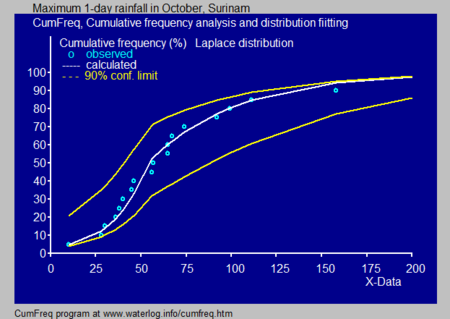

- În analiza regresiei, estimarea celor mai puține abateri absolute apare ca estimare a probabilității maxime dacă erorile au o distribuție Laplace.

## Bonus 

In [129]:
frepcomgen <- function(n,m){
    mat <- matrix(sample(1:10000, (n + 1) * (m + 1), replace=TRUE) , nrow = n + 1, ncol = m + 1)
 
#     mat <- matrix(1:(n*m), nrow = n + 1, ncol = m + 1)
    mat[n + 1,] <- 0
    mat[,m + 1] <- 0
 
    for (i in 1 : n){
        s <- 0
 
        for (j in 1 : m){
            s <- s + mat[i, j]
        }
        mat[i, m + 1] <- s
      }
    total <- 0
    for (j in 1: m){
        s <- 0
 
        for (i in 1: n){
            s <- s + mat[i, j]
        }
        total <- total + s
        mat[n + 1,j] <- s
    }
    mat[n + 1, m + 1] <- total
    mat <- mat / total
    mat[1,] = NaN
    mat[,1] = NaN
    return (mat)
}

In [130]:
res = frepcomgen(2, 3)

In [131]:
fcomplrepcom <- function(mat, n, m){
    mat[1,m+1] = 2 - sum(mat[,m + 1], na.rm = T)
    mat[n + 1, 1] = 2 - sum(mat[n + 1,], na.rm = T)
 
    for (i in 2:m){
        mat[1,i] <- 2 * mat[n + 1, i] - sum(mat[,i], na.rm = T)
    }
    for (i in 1:n){
        mat[i,1] <- 2 * mat[i, m + 1] - sum(mat[i,], na.rm = T)
    }
    return (mat)
}

In [132]:
result <- fcomplrepcom(res, 2, 3)